<a href="https://colab.research.google.com/github/darkxenios/MachineLearninghomework/blob/main/%D0%94%D0%97-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import warnings
warnings.filterwarnings('ignore')

## Black Friday Sales EDA


Розничная компания ABC Private Limited хочет понять покупательское поведение клиентов (в частности, сумму покупки) в отношении различных продуктов разных категорий. Они поделились сводкой покупок различных клиентов для избранных крупных партий продуктов за последний месяц.
Набор данных также содержит демографические данные клиентов (возраст, пол, семейное положение, тип города, город пребывания), сведения о продукте (идентификатор продукта и категория продукта) и общую сумму покупок за последний месяц. По признакам нужно решить кто совершил покупку мужчина или женщина. Это задача классификации.

# Загрузка данных

In [ ]:
url = "https://raw.githubusercontent.com/darkxenios/MachineLearninghomework/refs/heads/main/train.csv"
data_raw = pd.read_csv(url)

Вывод количества строк и столбцов

In [ ]:
data_raw.shape

(550068, 12)

In [ ]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
data_raw.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data_raw.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [ ]:
print(data_raw.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


Мы видим, что столбцы (признаки) имеют имена:
* User_ID    Пользовательский ID
* Product_ID   ID товара
* Gender    Пол пользователя
* Age   Возраст
* Occupation    Занятие (Спрятано)
* City_Category    Тип населенного пункта (A,B,C)
* Stay_In_Current_City_Years    кол-во лет в данном городе
* Marital_Status    Семейное положение
* Product_Category_1    Продуктовая категория  (Masked)
* Product_Category_2    Другая продуктовая категория (Masked)
* Product_Category_3    Ещё одна продуктовая категория (Masked)
* Purchase стоимость покупки (Целевая переменная)


In [ ]:
data_raw.index

RangeIndex(start=0, stop=550068, step=1)

Мы видим, что Gender и Marital_status - бинарные признаки. Однако у них и у некоторых других столбцов стоит тип object.

Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [ ]:
data_raw['Gender'] = (data_raw['Gender']).astype('category')
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['City_Category'] = data_raw['City_Category'].astype('category')
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('category')
data_raw['Marital_Status'] = data_raw['Marital_Status'].astype('category')

In [ ]:
data_raw['Gender'].dtype


CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['Age'].dtype

CategoricalDtype(categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['City_Category'].dtype

CategoricalDtype(categories=['A', 'B', 'C'], ordered=False, categories_dtype=object)

In [ ]:

data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].replace("Free", np.nan , regex=True)
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].apply(lambda v: float(str(v).replace("+","")))
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('float')
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

# Боремся с выбросами

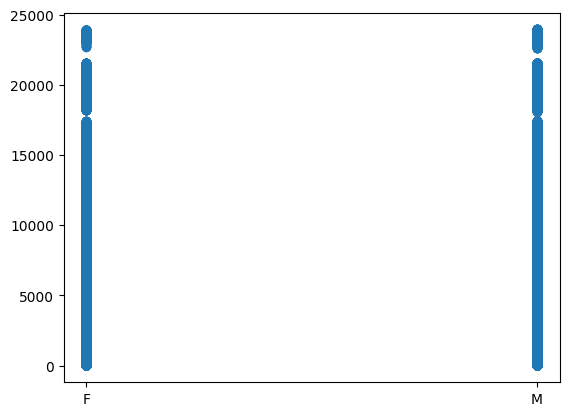

In [ ]:
plt.scatter(data_raw['Gender'], data_raw['Purchase'])
pass

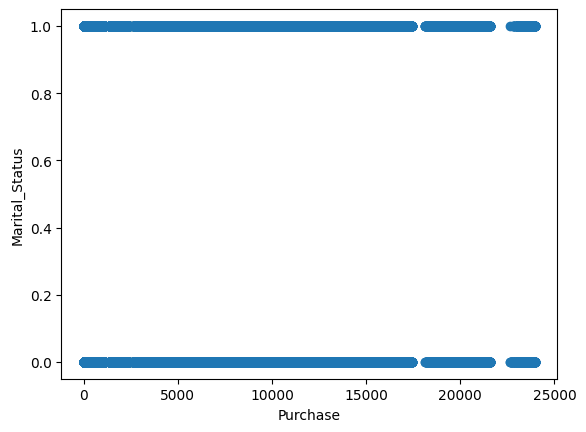

In [ ]:

plt.scatter(data_raw['Purchase'], data_raw['Marital_Status'], alpha=1)
plt.xlabel('Purchase')
plt.ylabel('Marital_Status')
pass

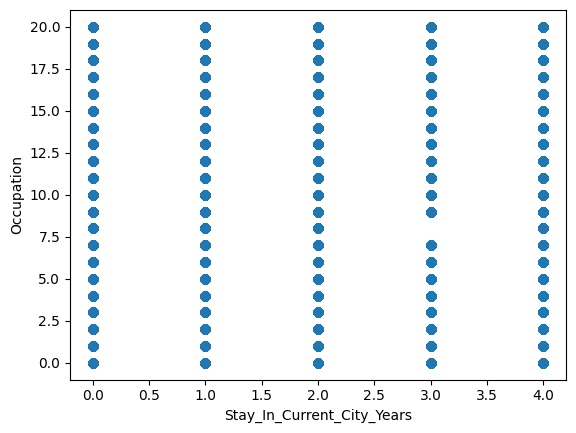

In [ ]:
plt.scatter(data_raw['Stay_In_Current_City_Years'], data_raw['Occupation'], alpha=1)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Occupation')
pass

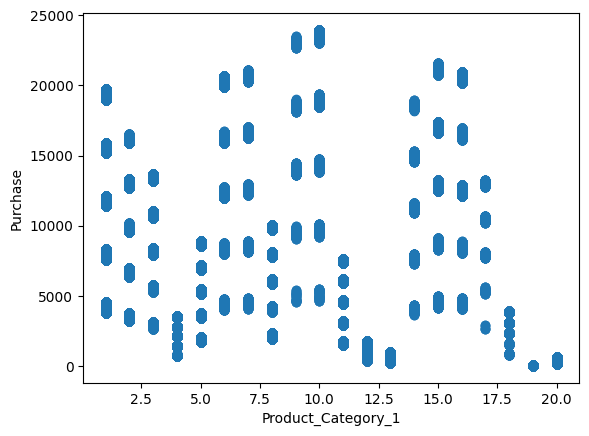

In [ ]:
plt.scatter(data_raw['Product_Category_1'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
pass

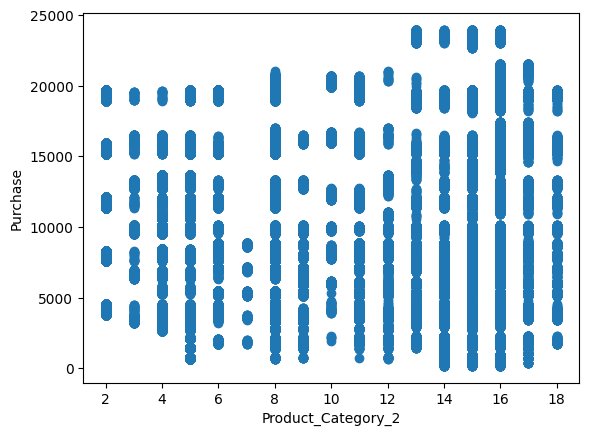

In [ ]:
plt.scatter(data_raw['Product_Category_2'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
pass

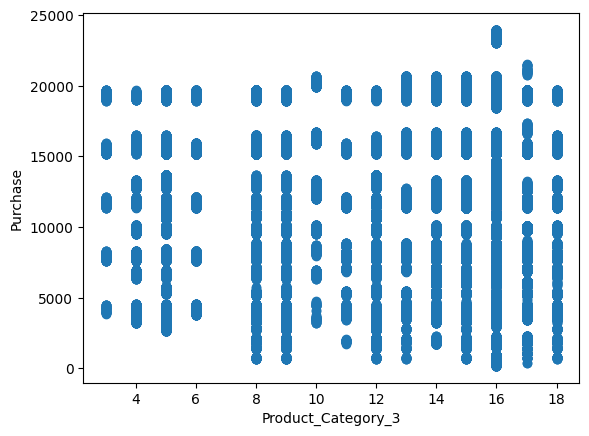

In [ ]:
plt.scatter(data_raw['Product_Category_3'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
pass

In [ ]:
data_raw['Purchase'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Purchase
0.005,354.0
0.010,587.0
0.050,1984.0
0.100,3540.0
0.500,8047.0
0.900,16317.0
0.950,19336.0
0.990,20665.0
0.995,21352.0


In [ ]:
rows_to_drop = data_raw[
    (data_raw['Product_Category_1'] > data_raw['Product_Category_1'].quantile(0.995)) |
    (data_raw['Product_Category_2'] > data_raw['Product_Category_2'].quantile(0.995)) |
    (data_raw['Product_Category_3']  > data_raw['Product_Category_3' ].quantile(0.995))|
    (data_raw['Purchase']  > data_raw['Purchase' ].quantile(0.995))].index

data = data_raw.drop(rows_to_drop)
data.shape

(544768, 12)

In [ ]:
# data['User_ID']

In [ ]:
#del data['Product_ID']

In [ ]:
rows_to_drop

Index([   343,    375,    652,    736,   1041,   1445,   1902,   3166,   3167,
         3172,
       ...
       550056, 550058, 550060, 550061, 550062, 550063, 550064, 550065, 550066,
       550067],
      dtype='int64', length=5300)

# Визуальная и описательная статистика

In [ ]:
data.describe()


,User_ID,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,374132.000000,166180.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,5.309216,9.813480,12.655350,9235.304572
std,1.727278e+03,6.522524,1.289540,3.805348,5.087768,4.128044,4911.594911
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,1.000000,5.000000,9.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,8.000000,15.000000,16.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,19.000000,18.000000,18.000000,21352.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544768 entries, 0 to 550059
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     544768 non-null  int64   
 1   Product_ID                  544768 non-null  object  
 2   Gender                      544768 non-null  category
 3   Age                         544768 non-null  category
 4   Occupation                  544768 non-null  int64   
 5   City_Category               544768 non-null  category
 6   Stay_In_Current_City_Years  544768 non-null  float64 
 7   Marital_Status              544768 non-null  category
 8   Product_Category_1          544768 non-null  int64   
 9   Product_Category_2          374132 non-null  float64 
 10  Product_Category_3          166180 non-null  float64 
 11  Purchase                    544768 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 3

In [ ]:
data.describe(include=['category'])

,Gender,Age,City_Category,Marital_Status
count,544768,544768,544768,544768
unique,2,7,3,2
top,M,26-35,B,0
freq,410285,217734,229334,321722


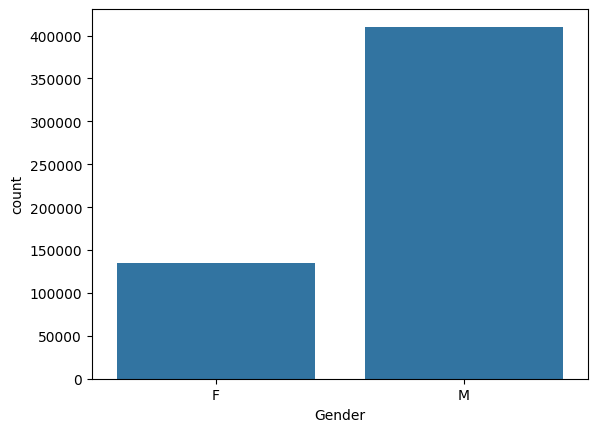

In [ ]:
sns.countplot(x='Gender', data=data)
pass

In [ ]:
data['Gender'].value_counts()

,count
Gender,
M,410285
F,134483


In [ ]:
new_data=data.groupby('User_ID')

In [ ]:
new_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
481655,1002111,P00120142,M,55+,13,C,4.0,1,5,NaN,NaN,6961
502348,1005391,P00084842,M,26-35,7,A,0.0,0,8,16.0,NaN,7873
502349,1005391,P00302042,M,26-35,7,A,0.0,0,5,NaN,NaN,1855
510699,1000708,P00116842,M,26-35,0,C,2.0,0,2,5.0,8.0,9685


In [ ]:
new=new_data['Gender'].unique()

In [ ]:
new.value_counts()


,count
Gender,
"['M'] Categories (2, object): ['F', 'M']",4225
"['F'] Categories (2, object): ['F', 'M']",1666


Мы посчитали уникальных пользователей и видим, что мужчин совершивших покупок в этом месяце значительно больше.

# Обработка пропущенных значений

In [ ]:
data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,170636


Заполним медианой пропущенные значения.

In [ ]:
data["Product_Category_2"].fillna(data["Product_Category_2"].median(axis = 0), axis=0 , inplace=True)
data["Product_Category_3"].fillna(data["Product_Category_3"].median(axis = 0), axis=0 , inplace=True)

In [ ]:
data.isna().sum()


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
data.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,5.309216,9.558676,13.589818,9235.304572
std,1.727278e+03,6.522524,1.289540,3.805348,4.233170,2.362523,4911.594911
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,1.000000,8.000000,14.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,8.000000,14.000000,14.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,19.000000,18.000000,18.000000,21352.000000


In [ ]:
data.describe(include=['category'])


,Gender,Age,City_Category,Marital_Status
count,544768,544768,544768,544768
unique,2,7,3,2
top,M,26-35,B,0
freq,410285,217734,229334,321722


# Бинаризация категориальных признаков

Так как категориальный признак 'Gender' выражен в буквеной форме, то мы его закодируем

In [ ]:
data.describe(include=['category'])


,Gender,Age,City_Category,Marital_Status
count,544768,544768,544768,544768
unique,2,7,3,2
top,M,26-35,B,0
freq,410285,217734,229334,321722


In [ ]:

data['Gender'] = pd.factorize(data['Gender'])[0]
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2.0,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2.0,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0-17,10,A,2.0,0,12,14.0,14.0,1057
4,1000002,P00285442,1,55+,16,C,4.0,0,8,9.0,14.0,7969


In [ ]:
data['City_Category'].unique()
city_dummies = pd.get_dummies(data_raw['City_Category'])
city_dummies.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [ ]:
data['Age'].unique()
age_dummies = pd.get_dummies(data_raw['Age'])
age_dummies.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544768 entries, 0 to 550059
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     544768 non-null  int64   
 1   Product_ID                  544768 non-null  object  
 2   Gender                      544768 non-null  int64   
 3   Age                         544768 non-null  category
 4   Occupation                  544768 non-null  int64   
 5   City_Category               544768 non-null  category
 6   Stay_In_Current_City_Years  544768 non-null  float64 
 7   Marital_Status              544768 non-null  category
 8   Product_Category_1          544768 non-null  int64   
 9   Product_Category_2          544768 non-null  float64 
 10  Product_Category_3          544768 non-null  float64 
 11  Purchase                    544768 non-null  int64   
dtypes: category(3), float64(3), int64(5), object(1)
memory usage: 4

In [ ]:
data = pd.concat((data, city_dummies), axis = 1)
data = pd.concat((data, age_dummies), axis = 1)

data = data.drop(['City_Category'], axis = 1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001.0,P00069042,0.0,0-17,10.0,2.0,0,3.0,9.0,14.0,...,True,False,False,True,False,False,False,False,False,False
1,1000001.0,P00248942,0.0,0-17,10.0,2.0,0,1.0,6.0,14.0,...,True,False,False,True,False,False,False,False,False,False
2,1000001.0,P00087842,0.0,0-17,10.0,2.0,0,12.0,9.0,14.0,...,True,False,False,True,False,False,False,False,False,False
3,1000001.0,P00085442,0.0,0-17,10.0,2.0,0,12.0,14.0,14.0,...,True,False,False,True,False,False,False,False,False,False
4,1000002.0,P00285442,1.0,55+,16.0,4.0,0,8.0,9.0,14.0,...,False,False,True,False,False,False,False,False,False,True


In [ ]:

data = data.drop(['Age'], axis = 1)
data.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001.0,P00069042,0.0,10.0,2.0,0,3.0,9.0,14.0,8370.0,True,False,False,True,False,False,False,False,False,False
1,1000001.0,P00248942,0.0,10.0,2.0,0,1.0,6.0,14.0,15200.0,True,False,False,True,False,False,False,False,False,False
2,1000001.0,P00087842,0.0,10.0,2.0,0,12.0,9.0,14.0,1422.0,True,False,False,True,False,False,False,False,False,False
3,1000001.0,P00085442,0.0,10.0,2.0,0,12.0,14.0,14.0,1057.0,True,False,False,True,False,False,False,False,False,False
4,1000002.0,P00285442,1.0,16.0,4.0,0,8.0,9.0,14.0,7969.0,False,False,True,False,False,False,False,False,False,True


In [ ]:
data=data.drop(['Product_ID'], axis = 1)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     544768 non-null  float64 
 1   Gender                      544768 non-null  float64 
 2   Occupation                  544768 non-null  float64 
 3   Stay_In_Current_City_Years  544768 non-null  float64 
 4   Marital_Status              544768 non-null  category
 5   Product_Category_1          544768 non-null  float64 
 6   Product_Category_2          544768 non-null  float64 
 7   Product_Category_3          544768 non-null  float64 
 8   Purchase                    544768 non-null  float64 
 9   A                           550068 non-null  bool    
 10  B                           550068 non-null  bool    
 11  C                           550068 non-null  bool    
 12  0-17                        550068 non-null  bool    
 13  18-2

# Обучение

выбор обучающей и тестовой выборки

In [ ]:
X = data.drop('Gender', axis = 1)
y = data['Gender']
feature_names = X.columns

In [ ]:

feature_names

Index(['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'A', 'B', 'C', '0-17', '18-25', '26-35', '36-45', '46-50',
       '51-55', '55+'],
      dtype='object')

In [ ]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [ ]:
y = np.array(y, dtype='int')
y

array([                   0,                    0,                    0,
       ..., -9223372036854775808, -9223372036854775808,
       -9223372036854775808])

Проверка на совпадение размерности массивов для работы с ними

разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 0.75 данных, за тестовую 0,25

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(550068, 18)
(550068,)


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

412551 137517


 **kNN - метод ближайших соседей**


10 соседей


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values